# Estudos de Caso - Classificação Multi-label

#### 14 - Importando bibliotecas necessárias

In [49]:
%matplotlib inline

import re

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

stop_words = set(stopwords.words('english'))

Data -> https://raw.githubusercontent.com/dhaarna29/Toxic-Friend-Identifier/master/traintoxic.csv

In [26]:
df = pd.read_csv("./Data/trainToxic.csv", encoding = "ISO-8859-1")
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


#### 15 - Número de comentários em cada categoria

In [27]:
df_toxic = df.drop(['id', 'comment_text'], axis=1)
counts = []
categories = list(df_toxic.columns.values)

for i in categories:
    counts.append((i, df_toxic[i].sum()))
    
df_stats = pd.DataFrame(counts, columns=['category', 'number_of_comments'])
df_stats

,category,number_of_comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


#### 16 - Plotando números de comentários por categoria

Text(0.5, 0, 'category')

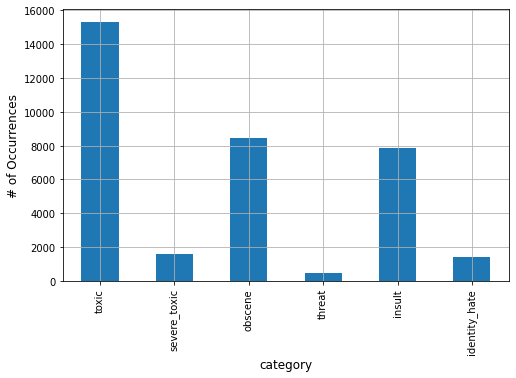

In [30]:
df_stats.plot(x='category', y='number_of_comments', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('category', fontsize=12)

#### 16 - Quantidade de comentários com rótulos múltiplos

/Users/marinaramalhetedesouza/opt/anaconda3/envs/ml-impa/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, '# of categories')

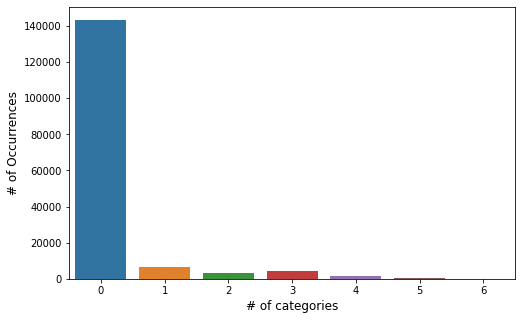

In [33]:
rowsums = df.iloc[:,2:].sum(axis=1)
x=rowsums.value_counts()#plot
plt.figure(figsize=(8,5))
ax = sns.barplot(x.index, x.values)
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of categories', fontsize=12)

#### 17 - Porcentagem de comentários não rotulados

In [34]:
print(len(df[(df['toxic']==0) & (df['severe_toxic']==0) 
             & (df['obscene']==0) & (df['threat']== 0) 
             & (df['insult']==0) & (df['identity_hate']==0)]) / len(df))

0.8983211235124177


#### 18 - Distribuição do número de caractéres nos comentários

<AxesSubplot:>

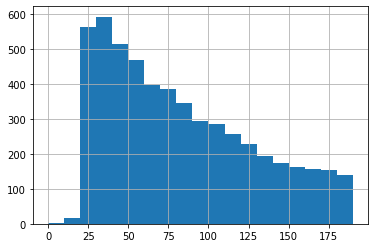

In [35]:
lens = df[df['insult'] == 1].comment_text.str.len()
lens.hist(bins = np.arange(0,200,10))

#### 18 - Há comentários faltando?

In [36]:
df['comment_text'].isnull().sum()

0

#### 19 - Exemplo do primeiro comentário

In [37]:
df['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

#### 20 - Limpeza de texto

In [38]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

df['comment_text'] = df['comment_text'].map(lambda com : clean_text(com))

df['comment_text'][0]

'explanation why the edits made under my username hardcore metallica fan were reverted they were not vandalisms just closure on some gas after i voted at new york dolls fac and please do not remove the template from the talk page since i am retired now 89 205 38 27'

#### 21 - Separando dados de treinamento e testes

In [42]:
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train, test = train_test_split(df, random_state=42, test_size=0.33, shuffle=True)
X_train = train.comment_text
X_test = test.comment_text
print(X_train.shape)
print(X_test.shape)

(106912,)
(52659,)


#### 22 - Pipeline UmContraTodos + Naive-Bayes Multinomial

In [47]:
NB_pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words)),
                        ('clf', OneVsRestClassifier(MultinomialNB(
                            fit_prior=True, class_prior=None))),
                       ])

for category in categories:
    print('... Processing {}'.format(category))
    # treina
    NB_pipeline.fit(X_train, train[category])
    # prevê
    prediction = NB_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing toxic
Test accuracy is 0.9192350785240889
... Processing severe_toxic
Test accuracy is 0.9900112041626312
... Processing obscene
Test accuracy is 0.9515752293055318
... Processing threat
Test accuracy is 0.9971135038644866
... Processing insult
Test accuracy is 0.9517271501547694
... Processing identity_hate
Test accuracy is 0.9910556600011394


#### 23 - Pipeline UmContraTodos + LinearSVC

In [50]:
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=5)),
            ])

for category in categories:
    print('... Processing {}'.format(category))
    # treina
    SVC_pipeline.fit(X_train, train[category])
    # prevê
    prediction = SVC_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing toxic
Test accuracy is 0.9600068364382157
... Processing severe_toxic
Test accuracy is 0.9906948479842003
... Processing obscene
Test accuracy is 0.9788830019559809
... Processing threat
Test accuracy is 0.9974363356691164
... Processing insult
Test accuracy is 0.971135038644866
... Processing identity_hate
Test accuracy is 0.9919861752027194
